In [3]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
hulu_df = pd.read_csv("Resources/hulu.csv")
hulu_df = hulu_df.set_index('Title')
hulu_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Attack on Titan,2013,16+,8.8,94%
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%
Community,2009,7+,8.5,88%
Parks and Recreation,2009,16+,8.6,93%
Twin Peaks,1990,18+,8.8,89%


In [5]:
imdb_average = hulu_df['IMDB'].mean()
imdb_average

7.0611074489123276

In [6]:
hulu_df_dropped = hulu_df.dropna()
hulu_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Attack on Titan,2013,16+,8.8,94%
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%
Community,2009,7+,8.5,88%
Parks and Recreation,2009,16+,8.6,93%
Twin Peaks,1990,18+,8.8,89%


In [7]:
hulu_df_dropped['RT'] = hulu_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
hulu_df_dropped.head()

<ipython-input-7-a09ab8a31142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df_dropped['RT'] = hulu_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
Attack on Titan,2013,16+,8.8,94%,94
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%,100
Community,2009,7+,8.5,88%,88
Parks and Recreation,2009,16+,8.6,93%,93
Twin Peaks,1990,18+,8.8,89%,89


In [8]:
rotten_average = hulu_df_dropped['RT'].mean()
age_group = hulu_df['Age'].mode()
total_shows = len(hulu_df)
title = hulu_df.index.to_list()

In [9]:
hulu_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = hulu_df.index[0]

In [10]:
hulu_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
hulu_df_dropped.head(100)
highest_rated_rt = hulu_df_dropped.index[0]
highest_rated_rt

<ipython-input-10-4baa30d3b3d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


'Fullmetal Alchemist: Brotherhood'

In [11]:
hulu = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rotten_average})
hulu

,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,1754,16+,Destiny,7.061107,Fullmetal Alchemist: Brotherhood,78.294286


In [12]:
hulu_df = hulu_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(hulu_df['Year'], bins, labels=groups)

0       2010-2020
1       2010-2020
2       1980-1989
3       2010-2020
4       2010-2020
          ...    
1749    2010-2020
1750    2010-2020
1751    2010-2020
1752    2010-2020
1753    2010-2020
Name: Year, Length: 1754, dtype: category
Categories (6, object): [1900-1949 < 1950-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010-2020]

In [13]:
hulu_df['Age Range'] = pd.cut(hulu_df['Year'], bins, labels=groups)
hulu_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Destiny,2014,NaN,9.6,NaN,2010-2020
1,Hungry Henry,2014,NaN,9.5,NaN,2010-2020
2,The Joy of Painting,1983,all,9.4,NaN,1980-1989
3,Rick and Morty,2013,18+,9.2,94%,2010-2020
4,Leah Remini: Scientology and the Aftermath,2016,16+,9.1,NaN,2010-2020


In [14]:
age_range_df = hulu_df.groupby("Age Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Destiny,2014,NaN,9.6,NaN,2010-2020
1,Hungry Henry,2014,NaN,9.5,NaN,2010-2020
2,The Joy of Painting,1983,all,9.4,NaN,1980-1989
3,Rick and Morty,2013,18+,9.2,94%,2010-2020
4,Leah Remini: Scientology and the Aftermath,2016,16+,9.1,NaN,2010-2020
...,...,...,...,...,...,...
1367,Showtime at the Apollo,1987,NaN,5.5,NaN,1980-1989
1371,This Week,1981,7+,5.5,NaN,1980-1989
1388,The Munsters Today,1988,NaN,5.3,NaN,1980-1989
1394,Baywatch,1989,7+,5.3,NaN,1980-1989


In [15]:
ranges = age_range_df["Age Range"].count()
ranges

Age Range
1900-1949       4
1950-1979      58
1980-1989      48
1990-1999     105
2000-2009     334
2010-2020    1205
Name: Age Range, dtype: int64

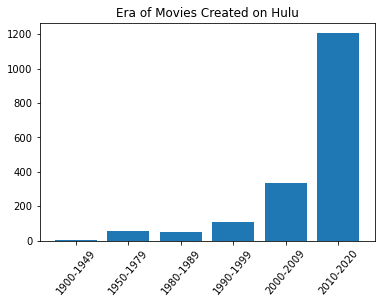

In [16]:
plt.bar(groups, ranges);
plt.title('Era of Movies Created on Hulu');
plt.xticks(rotation=50);